In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/cleaned/online_retail_cleaned.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


In [3]:
#Monthly Revenue Trend
monthly_revenue = (
    df.groupby('InvoiceMonth')['Revenue']
    .sum()
    .reset_index()
)

monthly_revenue['InvoiceMonth'] = monthly_revenue['InvoiceMonth'].astype(str)
monthly_revenue.head()

,InvoiceMonth,Revenue
0,2010-12,572713.890
1,2011-01,569445.040
2,2011-02,447137.350
3,2011-03,595500.760
4,2011-04,469200.361


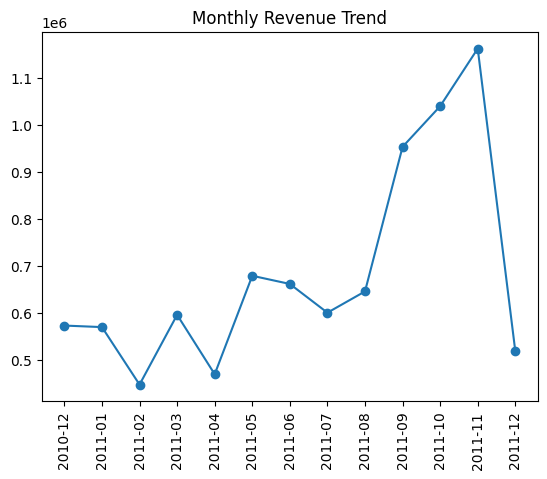

In [4]:
#Plotting Monthly Revenue Trend
plt.figure
plt.plot(monthly_revenue['InvoiceMonth'], monthly_revenue['Revenue'], marker='o')
plt.xticks(rotation=90)
plt.title('Monthly Revenue Trend')
plt.show()

In [6]:
# Active Customers Per Month

monthly_customers = (
    df.groupby('InvoiceMonth')['CustomerID']
    .nunique()
    .reset_index(name = 'ActiveCustomers')
)

monthly_customers['InvoiceMonth'] = monthly_customers['InvoiceMonth'].astype(str)
monthly_customers.head()

,InvoiceMonth,ActiveCustomers
0,2010-12,885
1,2011-01,741
2,2011-02,758
3,2011-03,974
4,2011-04,856


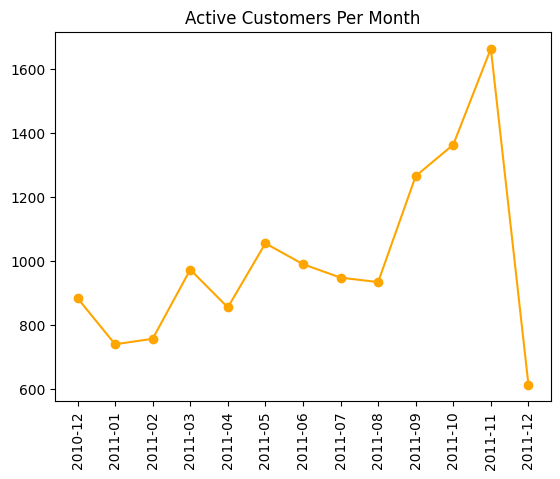

In [7]:
# Plot Active Customers Per Month
plt.figure()
plt.plot(monthly_customers['InvoiceMonth'], monthly_customers['ActiveCustomers'], marker='o', color='orange')
plt.xticks(rotation=90)
plt.title('Active Customers Per Month')
plt.show()

In [8]:
# Revenue per Customer Analysis(ARPC)

monthly_summary = monthly_revenue.merge(
    monthly_customers,
    on='InvoiceMonth'
)

monthly_summary['RevenuePerCustomer'] = (
    monthly_summary['Revenue'] / monthly_summary['ActiveCustomers']
)

monthly_summary.head()

,InvoiceMonth,Revenue,ActiveCustomers,RevenuePerCustomer
0,2010-12,572713.890,885,647.134339
1,2011-01,569445.040,741,768.481835
2,2011-02,447137.350,758,589.890963
3,2011-03,595500.760,974,611.397084
4,2011-04,469200.361,856,548.131263


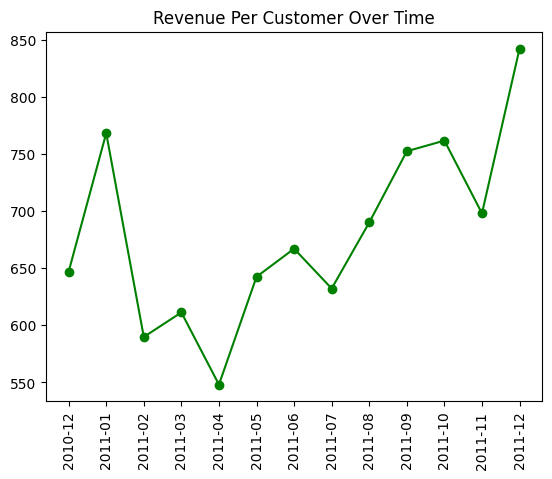

In [9]:
#Plot Monthly ARPC Trend
plt.figure()
plt.plot(monthly_summary['InvoiceMonth'], monthly_summary['RevenuePerCustomer'], marker ='o', color ='green')
plt.xticks(rotation=90)
plt.title('Revenue Per Customer Over Time')
plt.show()

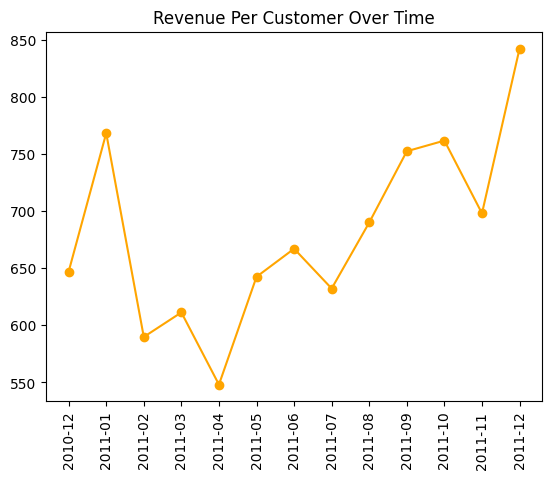

In [14]:
#Plot ARPC Trend
plt.figure()
plt.plot(monthly_summary['InvoiceMonth'], monthly_summary['RevenuePerCustomer'], marker ='o', color ='orange')
plt.xticks(rotation=90)
plt.title('Revenue Per Customer Over Time')
plt.show()

## Key Revenue Insight

* Monthly revenue shows a steady increase over time, indicating growth in sales. 
* Monthly revenue shows clear seasonal patterns, with peaks towards the end of each year, likely due to holiday shopping.
* Active customers count generally increases with revenue but shows more variability, indicating fluctuations in customer engagement. 
* Revenure per customer (ARPC) shows a gradual increase over time, suggesting that customers are spending more on average.